<a href="https://colab.research.google.com/github/e-c-centric/Group26_SportsPrediction/blob/main/Group26_SportsPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')
DatasetFifa21 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/players_21.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Preprocessing**

In [3]:
DatasetFifa21.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
DatasetFifa21.tail()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
18939,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,张梦炫,CB,47,52,70000.0,1000.0,21,...,47+2,47+2,47+2,45+2,15+2,https://cdn.sofifa.net/players/257/710/21_120.png,https://cdn.sofifa.net/teams/112165/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18940,257933,https://sofifa.com/player/257933/wenzhuo-huang...,Huang Wenzhou,黄文卓,CM,47,53,70000.0,1000.0,21,...,46+2,46+2,46+2,47+2,15+2,https://cdn.sofifa.net/players/257/933/21_120.png,https://cdn.sofifa.net/teams/112540/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18941,257936,https://sofifa.com/player/257936/yue-song/210002,Song Yue,宋岳,CM,47,47,45000.0,2000.0,28,...,46+1,46+1,46+1,47,11+2,https://cdn.sofifa.net/players/257/936/21_120.png,https://cdn.sofifa.net/teams/111774/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18942,258736,https://sofifa.com/player/258736/vani-da-silva...,V. Da Silva,Ivanilson Loforte Tique Da Silva,ST,47,67,130000.0,500.0,17,...,26+2,26+2,26+2,33+2,14+2,https://cdn.sofifa.net/players/258/736/21_120.png,https://cdn.sofifa.net/teams/1920/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png
18943,258760,https://sofifa.com/player/258760/ben-hough/210002,B. Hough,Ben Hough,CM,47,67,130000.0,500.0,17,...,41+2,41+2,41+2,43+2,14+2,https://cdn.sofifa.net/players/258/760/21_120.png,https://cdn.sofifa.net/teams/1920/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png


In [5]:
DatasetFifa21.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,18944.000000,18944.000000,18944.000000,1.870700e+04,18719.000000,18944.000000,18944.000000,18944.000000,18719.000000,18719.000000,...,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,2083.000000
mean,226232.328917,65.677787,71.086729,2.902288e+06,9148.482825,25.225823,181.190773,75.016892,47908.905551,1.355468,...,57.978674,46.470017,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309,37.203553
std,27166.574284,7.002278,6.109985,7.743775e+06,19893.149956,4.697354,6.825672,7.057140,53906.733776,0.739015,...,12.118390,20.169591,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121,10.714523
min,41.000000,47.000000,47.000000,9.000000e+03,500.000000,16.000000,155.000000,50.000000,1.000000,1.000000,...,12.000000,3.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,210028.750000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,461.000000,1.000000,...,50.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,28.000000
50%,232301.500000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1913.000000,1.000000,...,59.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,37.000000
75%,246745.750000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,110986.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,258970.000000,93.000000,95.000000,1.855000e+08,560000.000000,53.000000,206.000000,110.000000,114899.000000,4.000000,...,96.000000,94.000000,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000,65.000000


In [6]:
DatasetFifa21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 15.9+ MB


In [7]:
#Viewing all the column labels to be able to select the relevant columns
DatasetFifa21.columns.tolist()

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agi

In [8]:
#dropping the columns that are immediately evidently irrelevant to a player's overall rating
irrelevant_columns = ['sofifa_id', 'player_url', 'player_face_url', 'club_logo_url', 'club_flag_url', 'nation_logo_url', 'nation_flag_url','dob',
                      'potential', 'club_team_id',	'club_name',	'league_name']
DatasetFifa21.drop(columns=irrelevant_columns, inplace=True)

In [9]:
DatasetFifa21

,short_name,long_name,player_positions,overall,value_eur,wage_eur,age,height_cm,weight_kg,league_level,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,103500000.0,560000.0,33,170,72,1.0,...,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,63000000.0,220000.0,35,187,83,1.0,...,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3
2,R. Lewandowski,Robert Lewandowski,ST,91,111000000.0,240000.0,31,184,80,1.0,...,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
3,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,132000000.0,270000.0,28,175,68,1.0,...,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3
4,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,129000000.0,370000.0,29,181,70,1.0,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,Zhang Mengxuan,张梦炫,CB,47,70000.0,1000.0,21,177,70,1.0,...,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2,15+2
18940,Huang Wenzhou,黄文卓,CM,47,70000.0,1000.0,21,174,68,1.0,...,48+2,48+2,48+2,47+2,47+2,46+2,46+2,46+2,47+2,15+2
18941,Song Yue,宋岳,CM,47,45000.0,2000.0,28,185,79,1.0,...,47,47,47,47,47,46+1,46+1,46+1,47,11+2
18942,V. Da Silva,Ivanilson Loforte Tique Da Silva,ST,47,130000.0,500.0,17,171,58,4.0,...,32+2,32+2,32+2,35+2,33+2,26+2,26+2,26+2,33+2,14+2


**Feature Selection and Augmentation**

In [10]:
#A player's BMI might impact their performance in training, and consequently, actual football games
#A player's BMI might also afect their lower body joints (wear and tear), which would also affect their game availability.
#As such, we aggregate players' heights and weights into a BMI attribute, and then we categorize them. This should allow us
#see if there is colleration between players' overall rating and their BMI
def categorize_bmi(bmi):
    '''This method categorizes a players BMI into one of three categories: underweight, balanced, overweight
    The benchmarks used were sourced from https://sportsmanist.com/how-much-should-a-soccer-player-weigh and
    https://ids-water.com/2021/04/29/what-is-a-good-bmi-for-a-soccer-player/'''
    if bmi < 18.5:
        return 'Underweight'
    elif 20 <= bmi < 24.9:
        return 'Balanced'
    else:
        return 'Overweight'

In [11]:
#Creating a BMI column that contains players' BMIs calculated using each player's height and weight
height_meters = DatasetFifa21['height_cm'] / 100
DatasetFifa21['bmi'] = DatasetFifa21['weight_kg'] / (height_meters ** 2)

In [12]:
#Applying the categorize_bmi tp each player's BMI and creating a new column that contains the category
DatasetFifa21['bmi_category'] = DatasetFifa21['bmi'].apply(categorize_bmi)

In [13]:
DatasetFifa21['player_positions'].fillna('', inplace=True)
non_goalkeeper_df = DatasetFifa21.copy()
#goalkeeper_df = DatasetFifa21[DatasetFifa21['player_positions'].str.startswith('GK')]

#non_golakeeper_df = non_goalkeeper_df.drop(columns = ['goalkeeping_diving','goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning','goalkeeping_reflexes', 'goalkeeping_speed'])

#goalkeeper_df = goalkeeper_df.drop(columns = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'])

In [14]:
mean = non_goalkeeper_df['goalkeeping_speed'].mean()
non_goalkeeper_df['goalkeeping_speed'].fillna(mean, inplace = True)

In [15]:
'''attributes_to_mean_gk = [
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
    'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
    'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
    'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
    'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
    'mentality_penalties', 'mentality_composure', 'defending_marking_awareness',
    'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving',
    'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning',
    'goalkeeping_reflexes', 'goalkeeping_speed'
]'''

attributes_to_mean_non_gk = [
    'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
    'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
    'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
    'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
    'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
    'mentality_penalties', 'mentality_composure', 'defending_marking_awareness',
    'defending_standing_tackle', 'defending_sliding_tackle','goalkeeping_diving',
    'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning',
    'goalkeeping_reflexes', 'goalkeeping_speed'
]

In [16]:
non_goalkeeper_df['mean_attributes'] = non_goalkeeper_df[attributes_to_mean_non_gk].mean(axis = 1)
#goalkeeper_df['mean_attributes'] = non_goalkeeper_df[attributes_to_mean_gk].mean(axis = 1)

In [17]:
'''selected_features_gk = [
    'short_name', 'long_name', 'league_level', 'weak_foot', 'skill_moves', 'international_reputation',
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
    'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
    'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
    'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
    'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
    'mentality_penalties', 'mentality_composure', 'defending_marking_awareness',
    'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving',
    'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning',
    'goalkeeping_reflexes', 'goalkeeping_speed','bmi_category', 'value_eur',
    'wage_eur', 'release_clause_eur','age','mean_attributes', 'overall'
]'''
selected_features_non_gk = [
    'short_name', 'long_name', 'league_level', 'weak_foot', 'skill_moves', 'international_reputation',
    'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
    'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
    'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
    'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping',
    'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
    'mentality_interceptions', 'mentality_positioning', 'mentality_vision',
    'mentality_penalties', 'mentality_composure', 'defending_marking_awareness',
    'defending_standing_tackle', 'defending_sliding_tackle','bmi_category', 'value_eur',
    'wage_eur', 'release_clause_eur', 'goalkeeping_diving',
    'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning',
    'goalkeeping_reflexes', 'goalkeeping_speed','age','mean_attributes', 'overall'
]

In [18]:
data = non_goalkeeper_df[selected_features_non_gk].copy()

In [19]:
data.isnull().sum()

short_name                        0
long_name                         0
league_level                    225
weak_foot                         0
skill_moves                       0
international_reputation          0
pace                           2083
shooting                       2083
passing                        2083
dribbling                      2083
defending                      2083
physic                         2083
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy                 0
skill_long_passing                0
skill_ball_control                0
movement_acceleration             0
movement_sprint_speed             0
movement_agility                  0
movement_reactions                0
movement_balance                  0
power_shot_power            

In [20]:
#Replacing all NAs with the mean pf the column so they do not significantly impact calculations in later kernels, e.g. mean
#From inspection, the rows in the relevant columns that contain missing values are rows
#that contain numerical data

In [21]:
mean = data['value_eur'].mean()
data['value_eur'].fillna(mean, inplace = True)

In [22]:
mean = data['release_clause_eur'].mean()
data['release_clause_eur'].fillna(mean, inplace = True)

In [23]:
mean = data['wage_eur'].mean()
data['wage_eur'].fillna(mean, inplace = True)

In [24]:
mean = data['league_level'].mean()
data['league_level'].fillna(mean, inplace = True)

In [25]:
mean = data['pace'].mean()
data['pace'].fillna(mean, inplace = True)

In [26]:
mean = data['shooting'].mean()
data['shooting'].fillna(mean, inplace = True)

In [27]:
mean = data['passing'].mean()
data['passing'].fillna(mean, inplace = True)

In [28]:
mean = data['dribbling'].mean()
data['dribbling'].fillna(mean, inplace = True)

In [29]:
mean = data['defending'].mean()
data['defending'].fillna(mean, inplace = True)

In [30]:
mean = data['physic'].mean()
data['physic'].fillna(mean, inplace = True)

In [31]:
data.head()

,short_name,long_name,league_level,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,...,release_clause_eur,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,age,mean_attributes,overall
0,L. Messi,Lionel Andrés Messi Cuccittini,1.0,4,4,5,85.0,92.0,91.0,95.0,...,138400000.0,6,11,15,14,8,37.203553,33,69.029355,93
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1.0,4,5,5,89.0,93.0,81.0,89.0,...,75900000.0,7,11,15,14,11,37.203553,35,68.712282,92
2,R. Lewandowski,Robert Lewandowski,1.0,4,4,4,78.0,91.0,78.0,85.0,...,132000000.0,15,6,12,8,10,37.203553,31,67.736672,91
3,Neymar Jr,Neymar da Silva Santos Júnior,1.0,5,5,5,91.0,85.0,86.0,94.0,...,166500000.0,9,9,15,15,11,37.203553,28,67.224477,91
4,K. De Bruyne,Kevin De Bruyne,1.0,5,4,4,76.0,86.0,93.0,88.0,...,161000000.0,15,13,5,10,13,37.203553,29,71.151306,91


In [32]:
data.tail()

,short_name,long_name,league_level,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,...,release_clause_eur,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,age,mean_attributes,overall
18939,Zhang Mengxuan,张梦炫,1.0,2,2,1,58.0,23.0,26.0,27.0,...,57000.0,12,13,8,14,6,37.203553,21,35.200087,47
18940,Huang Wenzhou,黄文卓,1.0,2,2,1,58.0,32.0,49.0,47.0,...,72000.0,8,8,13,14,10,37.203553,21,40.663501,47
18941,Song Yue,宋岳,1.0,2,2,1,65.0,37.0,49.0,46.0,...,47000.0,8,5,11,5,7,37.203553,28,41.956184,47
18942,V. Da Silva,Ivanilson Loforte Tique Da Silva,4.0,2,2,1,70.0,46.0,40.0,53.0,...,165000.0,11,13,9,9,6,37.203553,17,39.102526,47
18943,B. Hough,Ben Hough,4.0,2,2,1,64.0,40.0,48.0,49.0,...,165000.0,12,10,9,6,8,37.203553,17,40.761062,47


In [33]:
data.columns.tolist()

['short_name',
 'long_name',
 'league_level',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'bmi_category',
 'value_eur',
 'wage_eur',
 'release_clause_eur',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking'

In [34]:
print(data.isnull().sum(), "\n\n")

short_name                     0
long_name                      0
league_level                   0
weak_foot                      0
skill_moves                    0
international_reputation       0
pace                           0
shooting                       0
passing                        0
dribbling                      0
defending                      0
physic                         0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_agility               0
movement_reactions             0
movement_balance               0
power_shot_power               0
power_jumping                  0
power_stamina                  0
power_stre

In [35]:
# Extract the independent variables
independent_variables = data.drop(columns=['overall', 'short_name', 'long_name'])

# Extract the dependent variable
dependent_variable = data['overall']

In [36]:
# Calculate the correlation matrix
correlation_matrix = independent_variables.corrwith(dependent_variable)

# Sort the correlations in descending order
sorted_correlations = correlation_matrix.abs().sort_values(ascending=False)

<ipython-input-36-85b8d39bfffa>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = independent_variables.corrwith(dependent_variable)


In [37]:
# Select the top 10 features with the highest correlation
n_top_features = 16
top_features = sorted_correlations[:n_top_features]

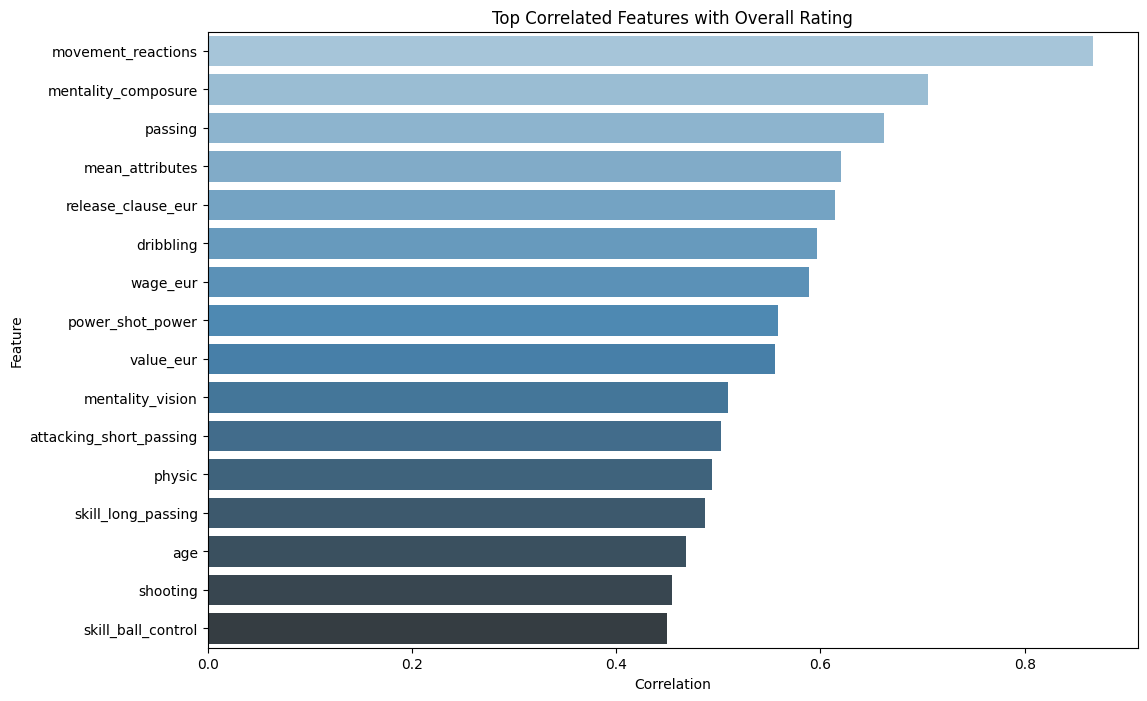

In [38]:
# Visualize the top correlated features
plt.figure(figsize=(12, 8))
sns.barplot(x=top_features, y=top_features.index, palette="Blues_d")
plt.title("Top Correlated Features with Overall Rating")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()

In [39]:
# Create feature subsets using the top correlated features
feature_subsets = data[top_features.index]

# Scale the independent variables
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(feature_subsets)

In [40]:
# Create a DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=feature_subsets.columns)

scaled_df.reset_index(drop=True, inplace=True)
dependent_variable.reset_index(drop=True, inplace=True)

# Combine scaled features with the dependent variable
final_data = pd.concat([scaled_df, dependent_variable],axis = 1)

In [41]:
final_data

,movement_reactions,mentality_composure,passing,mean_attributes,release_clause_eur,dribbling,wage_eur,power_shot_power,value_eur,mentality_vision,attacking_short_passing,physic,skill_long_passing,age,shooting,skill_ball_control,overall
0,0.985915,1.000000,0.970588,0.956346,0.681424,1.000000,1.000000,0.883117,0.557930,1.000000,0.965517,0.587302,0.977273,0.459459,0.987013,1.000000,93
1,1.000000,0.988095,0.823529,0.949823,0.373680,0.914286,0.392315,0.987013,0.339591,0.848837,0.862069,0.777778,0.818182,0.513514,1.000000,0.956044,92
2,0.971831,0.904762,0.779412,0.929752,0.649911,0.857143,0.428061,0.922078,0.598363,0.813953,0.885057,0.857143,0.738636,0.405405,0.974026,0.912088,91
3,0.943662,0.964286,0.897059,0.919215,0.819785,0.985714,0.481680,0.805195,0.711576,0.941860,0.919540,0.492063,0.863636,0.324324,0.896104,0.989011,91
4,0.943662,0.940476,1.000000,1.000000,0.792704,0.900000,0.660411,0.948052,0.695403,0.988372,1.000000,0.793651,1.000000,0.351351,0.909091,0.956044,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,0.338028,0.333333,0.014706,0.260392,0.000236,0.028571,0.000894,0.220779,0.000329,0.186047,0.275862,0.317460,0.227273,0.135135,0.090909,0.208791,47
18940,0.366197,0.273810,0.352941,0.372788,0.000310,0.314286,0.000894,0.259740,0.000329,0.511628,0.551724,0.317460,0.511364,0.135135,0.207792,0.439560,47
18941,0.281690,0.273810,0.352941,0.399382,0.000187,0.300000,0.002681,0.402597,0.000194,0.406977,0.563218,0.492063,0.579545,0.324324,0.272727,0.417582,47
18942,0.408451,0.392857,0.220588,0.340675,0.000768,0.400000,0.000000,0.415584,0.000652,0.465116,0.436782,0.190476,0.363636,0.027027,0.389610,0.428571,47


**Model Development**

In [42]:
final_data.columns.tolist()

['movement_reactions',
 'mentality_composure',
 'passing',
 'mean_attributes',
 'release_clause_eur',
 'dribbling',
 'wage_eur',
 'power_shot_power',
 'value_eur',
 'mentality_vision',
 'attacking_short_passing',
 'physic',
 'skill_long_passing',
 'age',
 'shooting',
 'skill_ball_control',
 'overall']

In [43]:
X = final_data.drop(columns=['overall'])
y = final_data['overall']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

In [46]:
#Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
rf_rmse = np.sqrt(-rf_scores.mean())

rf_model.fit(X_train, y_train)
score = rf_model.score(X_test, y_test)
mse = mean_squared_error(y_test, rf_model.predict(X_test))

print("RMSE: %.4f" % mse)
print("size of prediction: ", len(rf_model.predict(X_test)))
print("prediction: \n", rf_model.predict(X_test))
print("test score: {0:.4f}\n".format(score))

RMSE: 0.4393
size of prediction:  3789
prediction: 
 [59.97 63.97 58.57 ... 72.27 62.65 61.21]
test score: 0.9907



In [47]:
#XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
xgb_rmse = np.sqrt(-xgb_scores.mean())
xgb_model.fit(X_train, y_train)
score = xgb_model.score(X_test, y_test)
mse = mean_squared_error(y_test, xgb_model.predict(X_test))

print("RMSE: %.4f" % mse)
print("size of prediction: ", len(xgb_model.predict(X_test)))
print("prediction: \n", xgb_model.predict(X_test))
print("test score: {0:.4f}\n".format(score))

RMSE: 0.4780
size of prediction:  3789
prediction: 
 [59.88651  63.265522 58.953087 ... 71.313515 62.89378  60.941906]
test score: 0.9899



In [48]:
#Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=500, random_state=42, max_depth=4, min_samples_split=2, learning_rate=0.01)
gb_scores = cross_val_score(gb_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
gb_rmse = np.sqrt(-gb_scores.mean())
gb_model.fit(X_train, y_train)
score = gb_model.score(X_test, y_test)
mse = mean_squared_error(y_test, gb_model.predict(X_test))

print("RMSE: %.4f" % mse)
print("size of prediction: ", len(gb_model.predict(X_test)))
print("prediction: \n", gb_model.predict(X_test))
print("test score: {0:.4f}\n".format(score))

RMSE: 0.7724
size of prediction:  3789
prediction: 
 [59.83251115 63.67622772 58.18363645 ... 72.16920749 63.04356131
 61.17380625]
test score: 0.9836



In [49]:
dt_model = DecisionTreeRegressor()
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2']
}
grid_search = GridSearchCV(dt_model, param_grid, cv=kf, scoring='neg_mean_squared_error')
gs_scores = cross_val_score(dt_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
gs_rmse = np.sqrt(-gs_scores.mean())
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_

score = best_dt_model.score(X_test, y_test)
mse = mean_squared_error(y_test, best_dt_model.predict(X_test))

print("MSE: %.4f" % mse)
print("size of prediction: ", len(best_dt_model.predict(X_test)))
print("prediction: \n", best_dt_model.predict(X_test))
print("test score: {0:.4f}\n".format(score))

MSE: 0.8266
size of prediction:  3789
prediction: 
 [59.62871287 64.13636364 60.04545455 ... 72.         61.90243902
 61.21632653]
test score: 0.9825



**Optimization**

In [50]:
params = {'n_estimators': 10000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'squared_error'}
improved_gbr = GradientBoostingRegressor(**params)

improved_gbr.fit(X_train, y_train)

score = improved_gbr.score(X_test, y_test)

# calculate the Mean Squared Error
mse = mean_squared_error(y_test, improved_gbr.predict(X_test))

print("MSE: %.4f" % mse)
print("size of prediction: ", len(improved_gbr.predict(X_test)))
print("prediction: \n", improved_gbr.predict(X_test))
print("test score: {0:.4f}\n".format(score))

MSE: 0.4256
size of prediction:  3789
prediction: 
 [59.89696493 63.50310463 58.26662133 ... 72.42142524 63.28935544
 61.00632319]
test score: 0.9910



In [51]:
params = {'n_estimators': 10000, 'max_depth': 4, 'learning_rate': 0.01}

improved_xgb = xgb.XGBRegressor(**params)

improved_xgb.fit(X_train, y_train)

score = improved_xgb.score(X_test, y_test)

# calculate the Mean Squared Error
mse = mean_squared_error(y_test, improved_xgb.predict(X_test))

print("MSE: %.4f" % mse)
print("size of prediction: ", len(improved_xgb.predict(X_test)))
print("prediction: \n", improved_xgb.predict(X_test))
print("test score: {0:.4f}\n".format(score))

MSE: 0.4328
size of prediction:  3789
prediction: 
 [59.85702  63.60043  58.034267 ... 72.03307  63.30869  61.027813]
test score: 0.9908



**Ensembling**

In [53]:
ensemble = VotingRegressor(estimators=[
    ('improved_gbr', improved_gbr),
    ('improved_xgb', improved_xgb),
    ('rf_model', rf_model),
])

ensemble.fit(X_train, y_train)
score = ensemble.score(X_test, y_test)


# Make predictions using the ensemble model
y_pred = ensemble.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

print("MSE: %.4f" % mse)
print("size of prediction: ", len(ensemble.predict(X_test)))
print("prediction: \n", ensemble.predict(X_test))
print("test score: {0:.4f}\n".format(score))

MSE: 0.3866
size of prediction:  3789
prediction: 
 [59.90799542 63.69117805 58.29029625 ... 72.26746638 63.08268152
 61.08137872]
test score: 0.9918

